In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [172]:
df = pd.read_csv("Data/winequality-red.csv")

In [173]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
df.shape

(1599, 12)

In [99]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [53]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


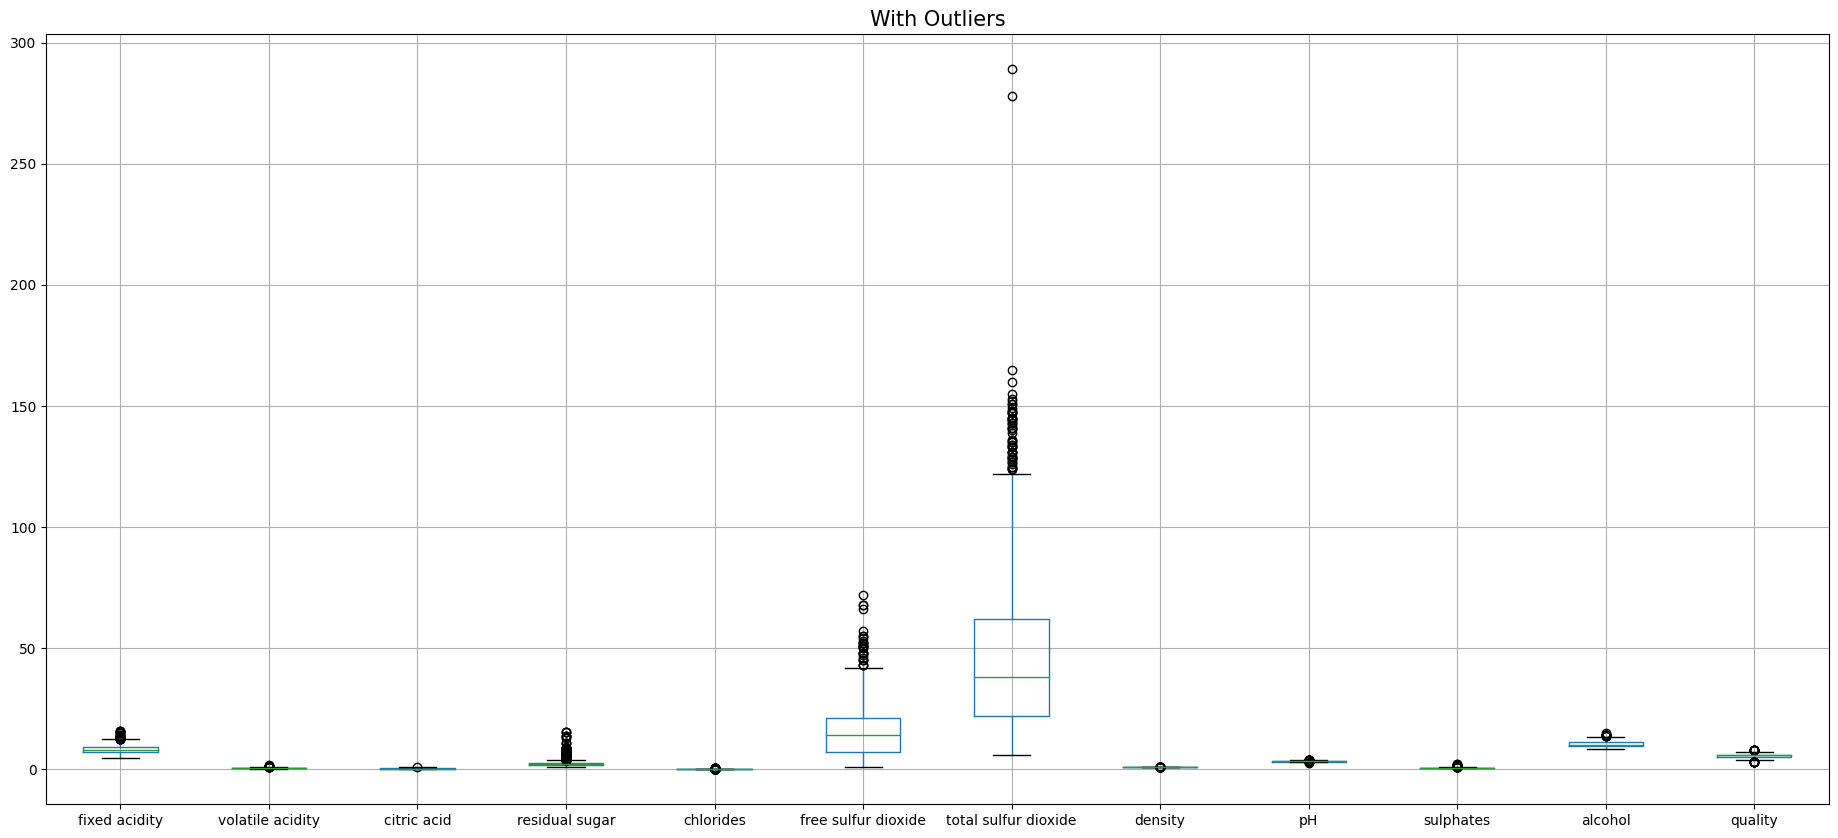

In [174]:
plt.figure(figsize=(23, 10))
plt.title("With Outliers", size=15)
df.boxplot()
plt.show()

In [175]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# num_features = df.select_dtypes(include="float64").columns
# num_features

In [178]:
def outliers(col, None):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

def remove_outlier(df):
    cols = df.select_dtypes(include='float64').columns
    for column in cols:
        lr, ur = outliers(df[column])
        df[column] = np.where(df[column]>ur, ur, df[column])
        df[column] = np.where(df[column]<lr, lr, df[column])
    return df
    

# def remove_outliers(df):
#     cols = df.select_dtypes(include='float64').columns
#     Q1, Q3 = np.percentile(df[cols], [25, 75])
#     IQR = Q3 - Q1
#     lr = Q1 - (1.5 * IQR)
#     ur = Q3 + (1.5 * IQR)
#     return df[(df >= lr) & (df <= ur)]

remove_outlier(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


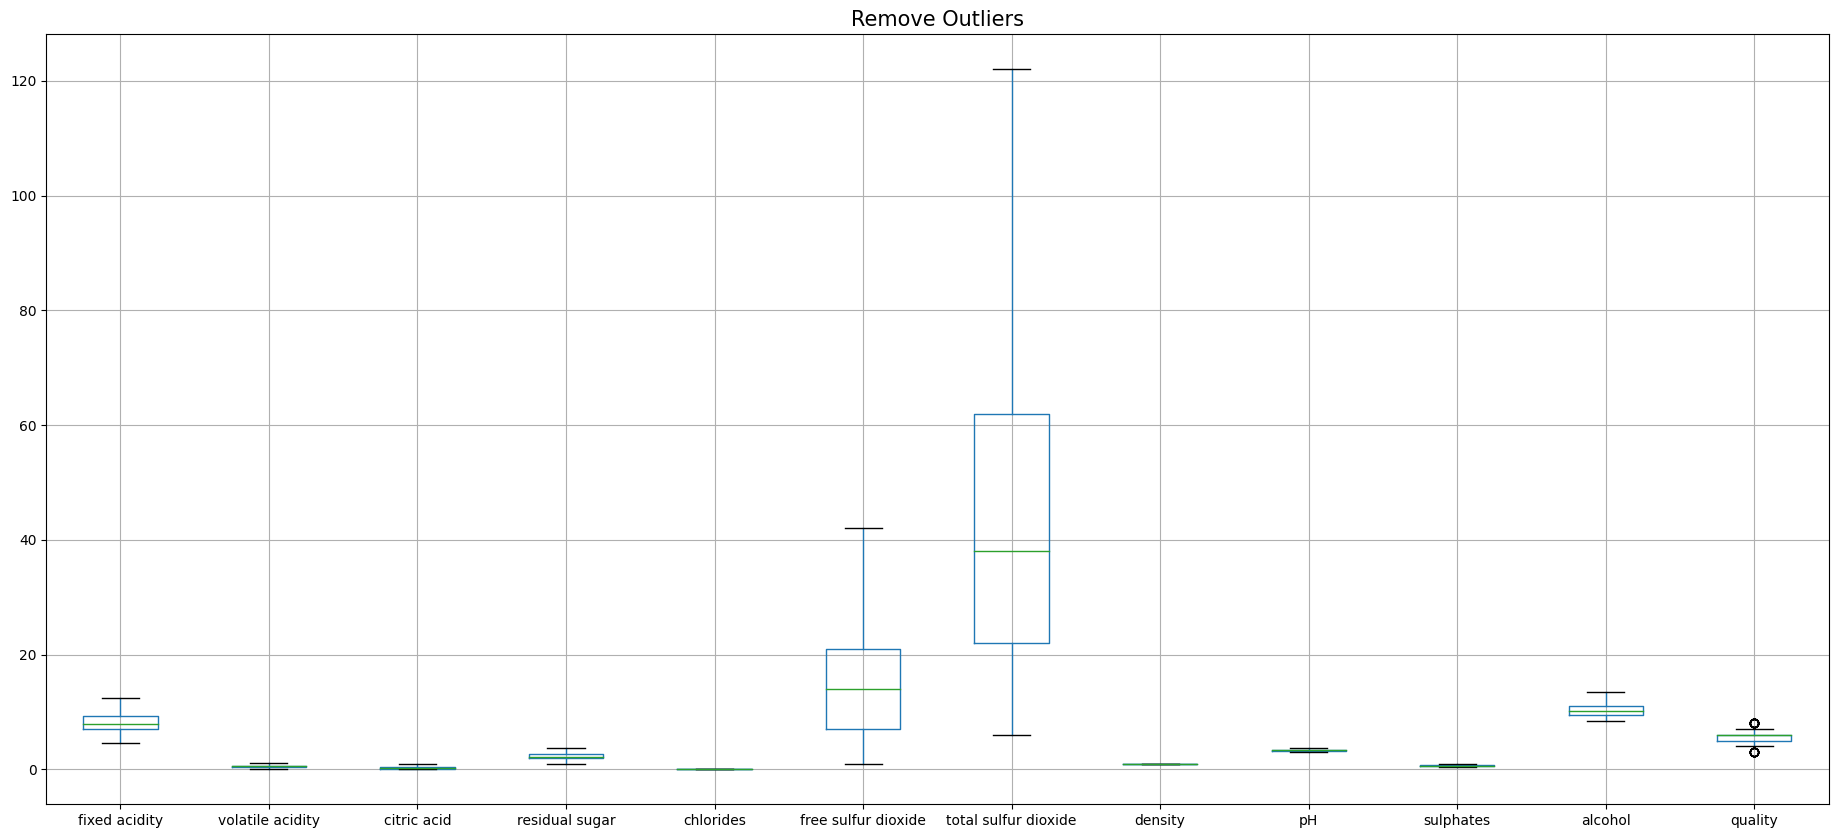

In [177]:
plt.figure(figsize=(23, 10))
plt.title("Remove Outliers", size=15)
df.boxplot()
plt.show()

In [142]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


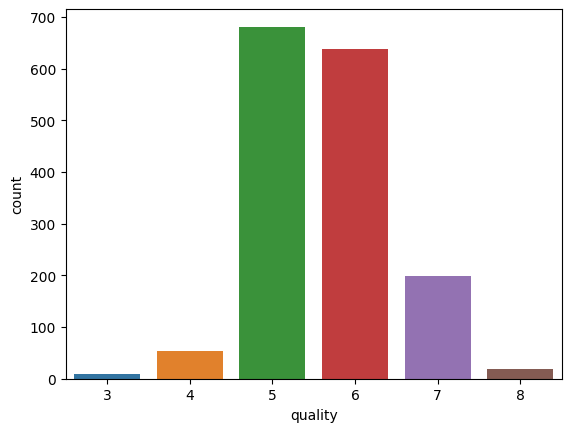

In [98]:
sn.countplot(df.quality)
plt.show()

### Insight

- From the above plot, it's clearly visible that most of the counts are in Wine Quality 5 and 6.

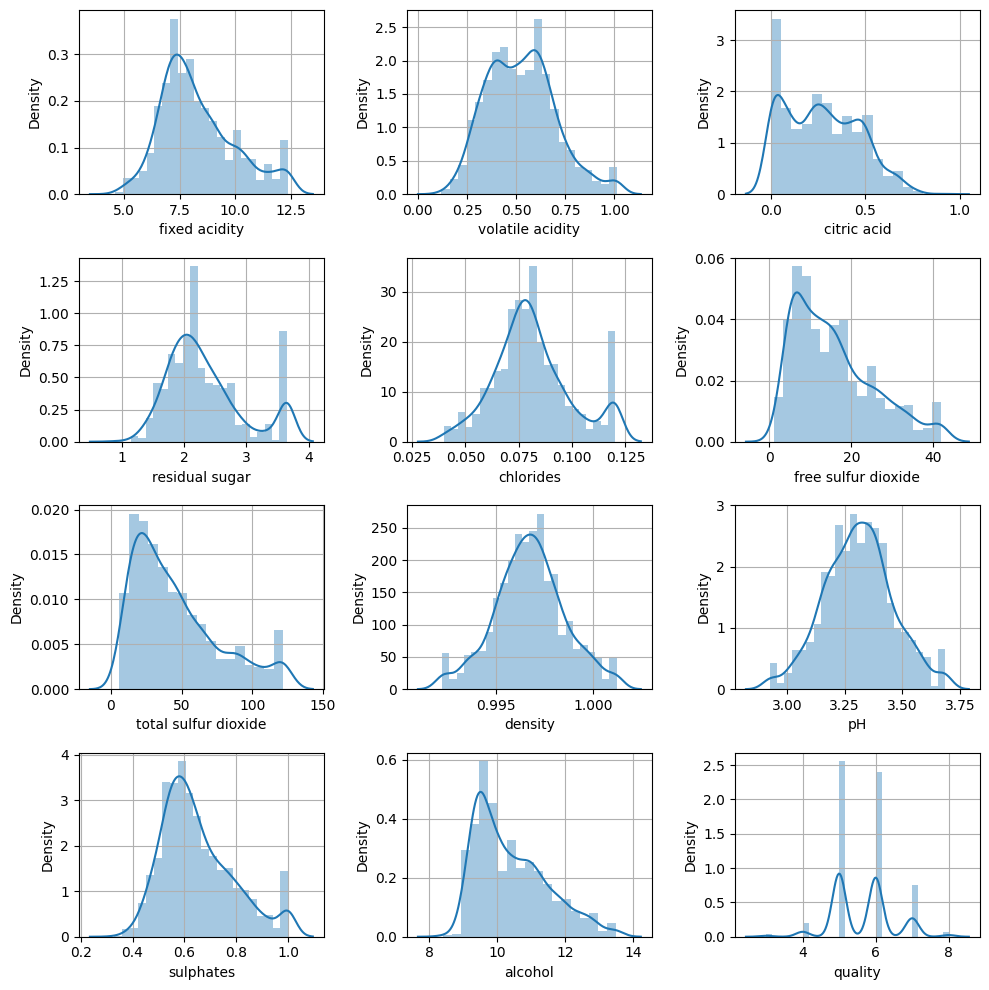

In [131]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4, 3, i+1)
    sn.distplot(df[col], kde=True)
    plt.grid()
    plt.tight_layout()

### Insight

- Volatile acidity, chlorides, density, pH feature is approximately normally distributed.
- Remaining all independent features are positively skewed.

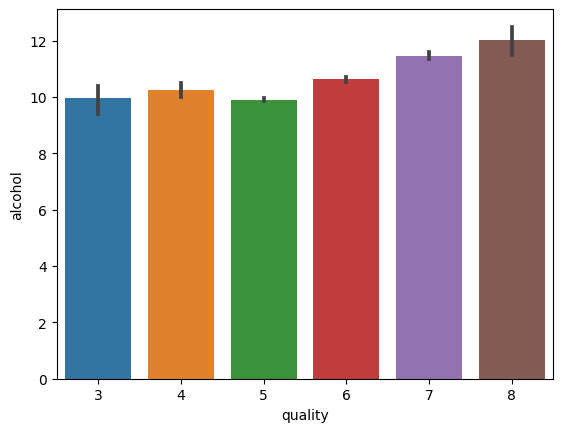

In [123]:
sn.barplot(data=df, x='quality', y='alcohol')
plt.show()

<Axes: >

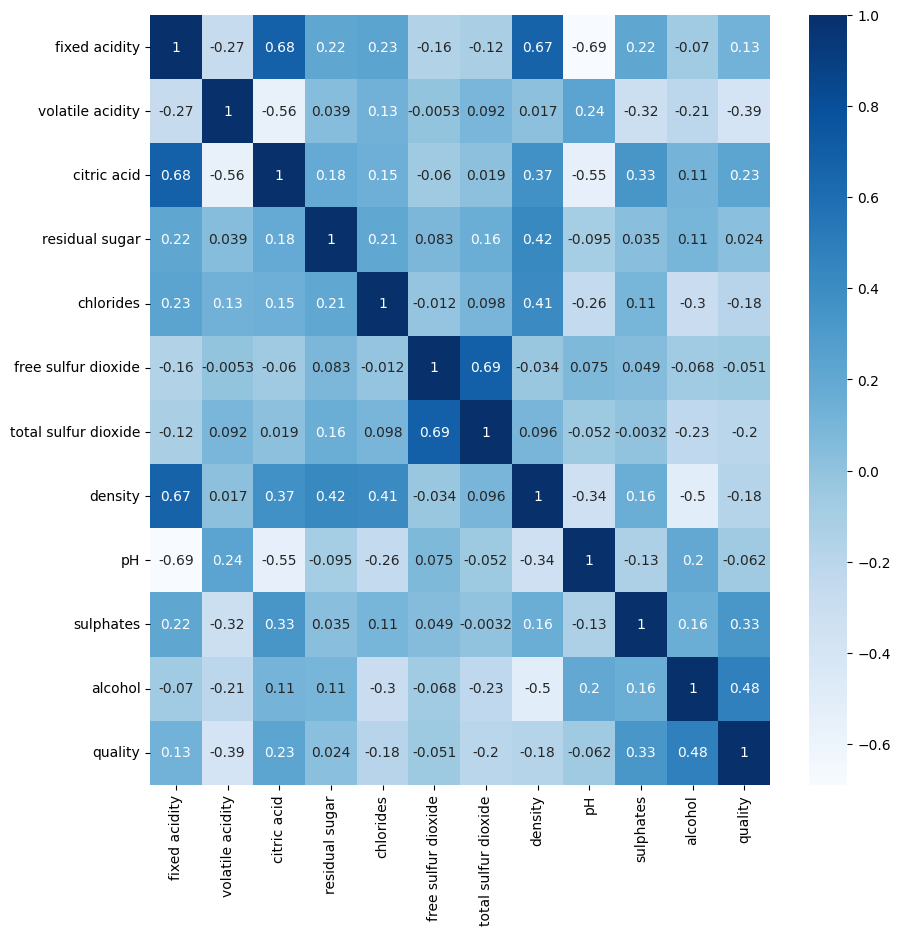

In [144]:
plt.figure(figsize=(10, 10))
sn.heatmap(df.corr(),cmap='Blues', annot=True)

### Insight

- Density has a positive correlation with fixed acidity, whereas it has a negative correlation with alcohol.
- Fixed acidity has a positive correlation with citric acid & density, whereas it has a negative correlation with pH.
- Citric acid has a negative correlation with volatile acidity & pH.
- Free sulfur dioxide has a positive correlation with total sulfur dioxide.

In [167]:
for col in columns:
    print(f"Number of unique values of {col} : {df[col].nunique()}")

Number of unique values of fixed acidity : 78
Number of unique values of volatile acidity : 131
Number of unique values of citric acid : 80
Number of unique values of residual sugar : 39
Number of unique values of chlorides : 81
Number of unique values of free sulfur dioxide : 45
Number of unique values of total sulfur dioxide : 114
Number of unique values of density : 411
Number of unique values of pH : 74
Number of unique values of sulphates : 63
Number of unique values of alcohol : 61


### Insight

- The feature that has a maximum unique value is density.
- The feature that has a minimum unique value is residual sugar.

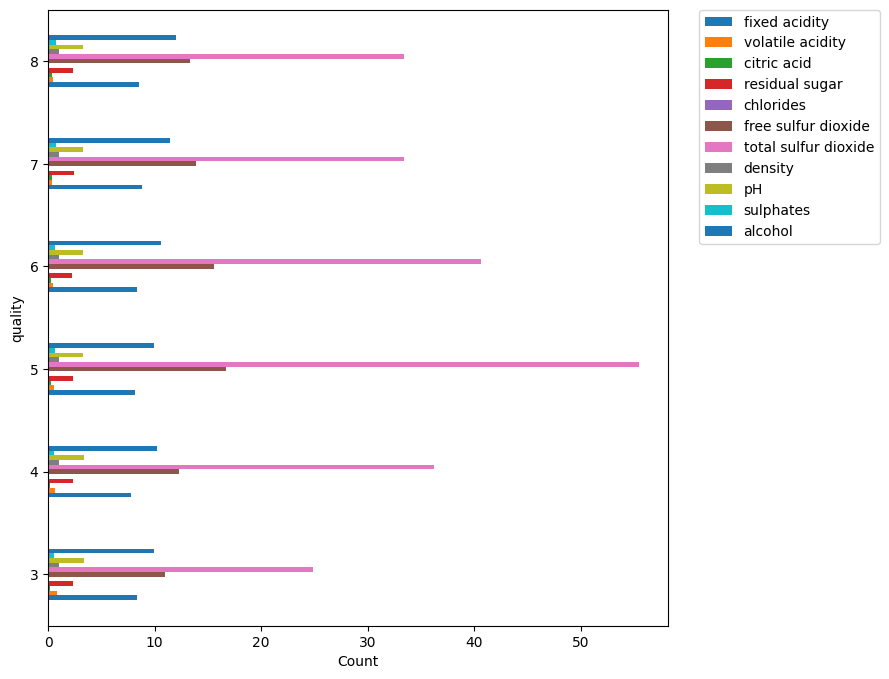

In [182]:
df.groupby('quality').agg('mean').plot(kind='barh', figsize=(8,8))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xlabel('Count')
plt.ylabel('quality')
plt.show()

### Insight

- It is observed that the level of Total Sulfur Dioxide is high in wines that are rated 5 and 6 in terms of quality.

In [ ]:
df.dtypes